# ENV ECON 118/IAS 118 - Introductory Applied Econometrics Assignment 1

## Fall 2022

There is a large literature in macroeconomics that investigates why there exist such large differences in gross domestic product (GDP) per capita between developed and developing countries. Recently economists have focused on the role of agriculture in accounting for these differences (Restuccia et al. 2008, _Journal of Monetary Economics_). Why might agriculture be important? Consider two facts, which we will explore in greater detail below. First, labor productivity in agriculture for the richest countries is 78 times that of the poorest countries. Second, the poorest countries allocate 86% of their employment to this sector, as compared to only 4% in the richest countries.

<p style="text-align: center;"> Figure 1. </p>

<img src="fig1.png" width="400" />

<p style="text-align: center;"> Figure 2. </p>

<img src="fig2.png" width="400" />

The data are from the World Bank development indicators (http://data.worldbank.org/data-catalog/world-development-indicators) for 2019. 

Labor Productivity in Agriculture is measured as the output of the agricultural sector less the value of intermediate inputs, divided by the number of workers. It is measured in thousands of US $ \$ $. GDP per capita is gross domestic product divided by midyear population, and is also measured in thousands of US $ \$ $. Agricultural Employment is the percentage of all workers engaged in agriculture. 

The graphs above include all 94 countries in the original dataset which have data on Labor Productivity in Agriculture, Agricultural Employment and GDP per capita. The values for selected countries can be found in the csv files "countries1" and "countries2".

# Exercise 1. Relationship between GDP per capita and Labor Productivity in Agriculture

As you see in Figure 1, there appears to be some association between GDP per capita and Labor
Productivity in Agriculture.
We will estimate a simple linear relationship on a (very small) subset of 5 countries.

(a) Use R to create a scatter plot of these observations. 

a-Step 1: Load the .csv file called countries1.csv. (Hint: the `read.csv()` command will likely be helpful.)

In [1]:
country1 <- read.csv('countries1.csv', header = TRUE)

a-Step 2: Look at the data. This dataset only has 5 rows so you can just call the entire dataset. In general you want to use the `head()` command so that R does not print the entire dataset which will take way too many pages.

In [2]:
head(country1)

,X,gdp_pc_1000USD,lapor_prod_1000USD
,<chr>,<dbl>,<dbl>
1,Australia,57.071168,72.841576
2,Bolivia,2.579899,1.839881
3,India,2.169140,1.978327
4,Lithuania,18.427152,13.874642
5,Saudi Arabia,20.542164,50.349904


a-Step 3: Rename the variables to "country", "gdp_pc", and "labor_prod". (Hint: the `colnames()` command may be useful. Also remember that to select multiple values (such as mulitple variable names, you can use R's vector notation `c()`. For example: `c("a", "b", "c")`.

In [3]:
names(country1) <- c("country","gdp_pc","labor_prod")
head(country1)

,country,gdp_pc,labor_prod
,<chr>,<dbl>,<dbl>
1,Australia,57.071168,72.841576
2,Bolivia,2.579899,1.839881
3,India,2.169140,1.978327
4,Lithuania,18.427152,13.874642
5,Saudi Arabia,20.542164,50.349904


a-Step 4: Create a scatterplot of the data. Make sure to (1) label the axes and their
units, and (2) title your graph. (Hint: the `plot()` command will likely come in handy. Use `help(plot)` or `?plot` to view the documentation for the function and how to include labels.)

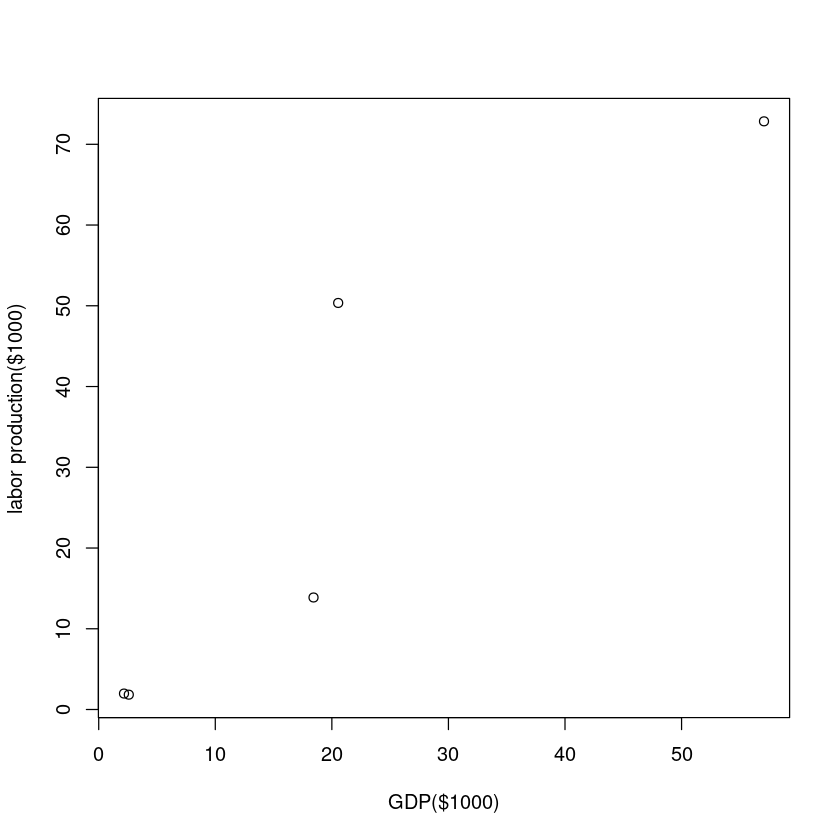

In [28]:
plot(country1$gdp_pc,country1$labor_prod, 
     xlab = "GDP($1000)",ylab="labor production($1000)")

b) Estimate the linear relationship between GDP per capita and Labor Productivity in Agriculture ("E") by OLS, showing all intermediate calculations as we did in the handout.

$$\widehat{E} = \hat{\beta}_0 + \hat{\beta}_1GDP / cap$$

For this exercise,  **DO NOT** use the built-in R commands like `cov()` or `lm()`. Use basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to reproduce all the values from table and show all the steps.

b-Step 1: Create new data objects called  __mean_gdp_pc__ and __mean_labor_prod__ equal to the mean of __gdp_pc__ and __labor_prod__.

In [29]:
mean_gdp_pc <- mean(country1$gdp_pc)
mean_labor_prod <- mean(country1$labor_prod)
c(mean_gdp_pc,mean_labor_prod)

[1] 20.15790 28.17687

b-Step 2: Calculate the covariance (only using the mathematical operations specified above) between gdp_pc and labor_prod: $cov(gdp_{pc},labor_{prod})$. 

- Do this by first creating two new columns of residuals: __devgdp__, a column that subtracts the __mean_gdp_pc__ from __gdp_pc__ and __devlp__ that subtracts the __mean_labor_prod__ from __labor_prod__. 
- Next create a column __devgdplp__ which is equal to __devlp__ multiplied by __devgdp__.
- Finally, generate a value named `covar` which is equal to the sum of __devgdplp__ divided by n-1.
- Make sure to call `covar` at the end so we can see it printed in the output.

In [47]:
# Create new columns with residuals (x_i-\bar{x}) and (y_i-\bar{y}) as part of␣
library(tidyverse)
country1 <- mutate(country1, devgdp = gdp_pc - mean_gdp_pc,
                   devlp = labor_prod - mean_labor_prod)
country1 <- mutate(country1, devgdplp = devlp*devgdp)
covar <- sum(country1$devgdplp)/(nrow(country1)-1)
country1
covar

country,gdp_pc,labor_prod,devgdp,devlp,devgdplp,sqdev,regres,fitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,57.071168,72.841576,36.9132636,44.66471,1648.720232,1362.5890313,-3.662730,76.504306
Bolivia,2.579899,1.839881,-17.5780056,-26.33699,462.951674,308.9862794,-3.323577,5.163458
India,2.169140,1.978327,-17.9887645,-26.19854,471.279350,323.5956479,-2.647359,4.625685
Lithuania,18.427152,13.874642,-1.7307529,-14.30222,24.753616,2.9955056,-12.036295,25.910936
Saudi Arabia,20.542164,50.349904,0.3842593,22.17304,8.520197,0.1476552,21.669960,28.679944


[1] 654.0563

b-Step 3: Calculate the variance. 
- First generate a column __sqdev__ equal to the square of __devgdp__. 
- Generate a value named `var` which is equal to the sum of __sqdevgdp__ divided by n-1. 
- Make sure to call `var` at the end so we can see it printed in the output.

In [31]:
country1 <- mutate(country1, sqdev = devgdp^2)
var <- sum(country1$sqdev)/(nrow(country1)-1)
var

[1] 499.5785

b-Step 4: Using the quantities generated above, generate and print `beta_1` and `beta_0`, your estimates for $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [32]:
beta1 <- covar/var
beta0 <- mean_labor_prod - mean_gdp_pc*beta1
c(beta0,beta1)

[1] 1.785812 1.309216

c) Interpret the value of the estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$

Beta0 in this model predicts that country with 0 GDP would have labor production of 1.78 ( Dollars 1000). Beta1 in this model predicts that each additional GDP( Dolloars 1000) would change(increase) the labor production by 1.30(Dollars 1000)(or 130 percentage change) in labor production.

d) In your data frame, compute the fitted value and the residual (the difference between the actual and fitted value) for each observation. Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Create a new column named "fitted" and another new column called "residuals". Call the head() of your dataset so we can see these new columns. Verify that the residuals sum to 0 (approximately).

In [33]:
country1 <- mutate(country1, regres=labor_prod-beta0-beta1*gdp_pc)
country1 <- mutate(country1, fitted = beta0+beta1*country1$gdp_pc)
country1

country,gdp_pc,labor_prod,devgdp,devlp,devgdplp,sqdev,regres,fitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,57.071168,72.841576,36.9132636,44.66471,1648.720232,1362.5890313,-3.662730,76.504306
Bolivia,2.579899,1.839881,-17.5780056,-26.33699,462.951674,308.9862794,-3.323577,5.163458
India,2.169140,1.978327,-17.9887645,-26.19854,471.279350,323.5956479,-2.647359,4.625685
Lithuania,18.427152,13.874642,-1.7307529,-14.30222,24.753616,2.9955056,-12.036295,25.910936
Saudi Arabia,20.542164,50.349904,0.3842593,22.17304,8.520197,0.1476552,21.669960,28.679944


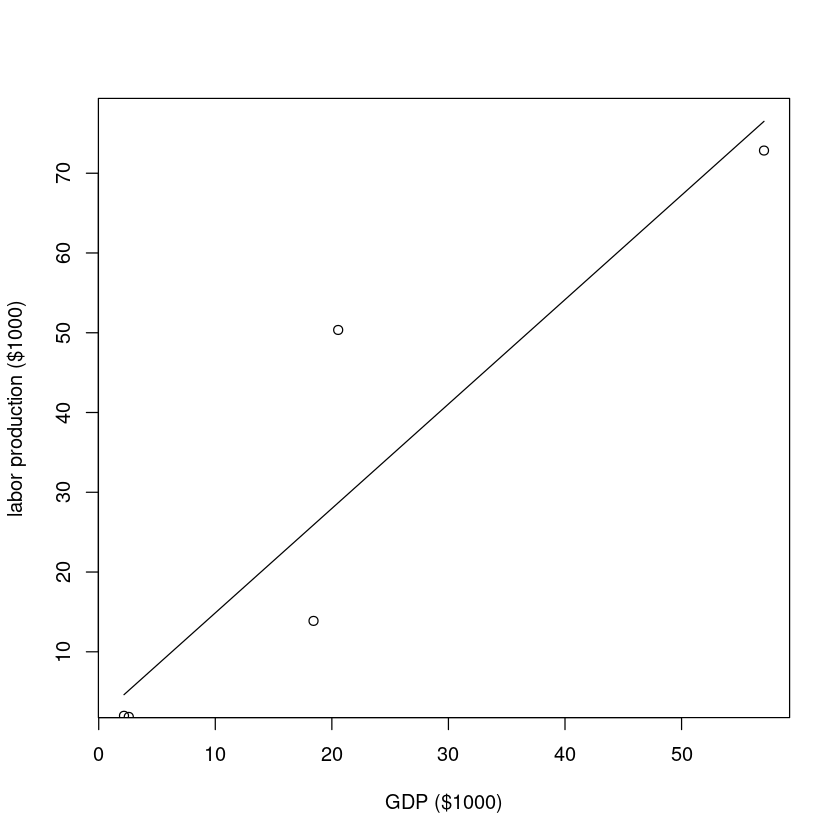

In [36]:
curve(beta0 + beta1*x,min(country1$gdp_pc),max(country1$gdp_pc),
xlab="GDP ($1000)",ylab="labor production ($1000)")
points(country1$gdp_pc,country1$labor_prod)

e) Now use the `lm()` command to run this regression automatically rather than manually as you did above and save the output as "reg1". 

Check that your estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ that you calculated manually above match the estimates using `lm()`. 
Call the `summary()` of reg1 so we can see the output.

In [37]:
holder <- lm(labor_prod~gdp_pc,data=country1)
summary(holder)


Call:
lm(formula = labor_prod ~ gdp_pc, data = country1)

Residuals:
      1       2       3       4       5 
 -3.663  -3.324  -2.647 -12.036  21.670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.7858     9.3190   0.192   0.8603  
gdp_pc        1.3092     0.3282   3.989   0.0282 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.67 on 3 degrees of freedom
Multiple R-squared:  0.8413,	Adjusted R-squared:  0.7885 
F-statistic: 15.91 on 1 and 3 DF,  p-value: 0.02822


f) According to the estimated relation, what is the predicted $\widehat{E}$ for a country with a GDP per capita of \$12,000?



In [38]:
beta0 + ((beta1*12000)/1000)

[1] 17.49641

In [39]:
(beta0 + ((beta1*12000)/1000))*1000

[1] 17496.41

The prediction for $12,000 GDP per capita would be 17496 or 17.496(thousands) in labor production.

g) How much of the variation in Labor Productivity in Agriculture for these 5 countries is explained by their GDP per capita?

Calculate the $R^2$ by calculating the sum of squared model residuals and the sum of squared total (variation of the dependent variable). Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Then calculate $R^2$ and make sure to call the value so we can see it printed out.

In [40]:
##r_squared <- sum((country1$devgdp^2) + (country1$devlp^2))
##r_squared
SST<-sum(country1$devlp^2)
SSR<-sum(country1$regres^2)
r_squared<-1-SSR/SST
r_squared

[1] 0.8413391

h) Repeat exercises (a), (b), and (e) for the additional set of countries whose data is available in the file countries2.csv.
*Note:* We outline how you might fill out the code in separate cells. If needed, click on "Insert" in the menu to add additional cells below, or simply click "b" on your keyboard while not in edit mode to add a cell below. Click "d" twice while not in edit mode to delete a cell, or go to "Edit"->"Delete Cells".

,country,gdp_pc,labor_prod
,<chr>,<dbl>,<dbl>
1,China,8.254301,4.188375
2,Mexico,10.275634,6.057267
3,Nigeria,2.386872,6.186895
4,Qatar,62.021075,11.925953
5,Uzbekistan,2.458994,5.737385


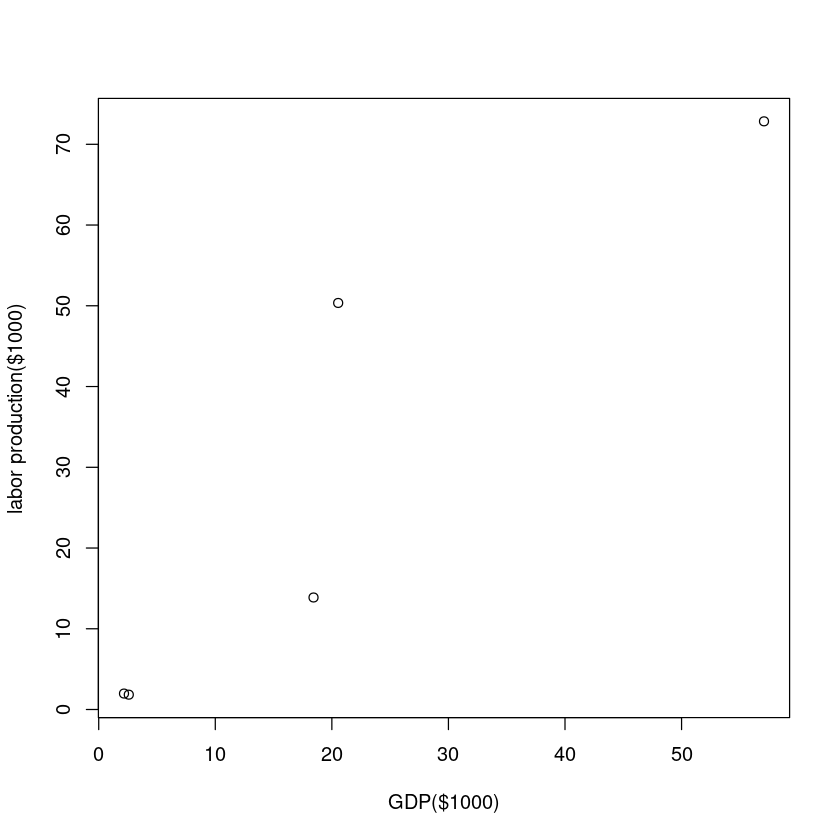

In [45]:
# (a) Steps 1-3
country2 <- read.csv('countries2.csv', header = TRUE)
names(country2) <- c("country","gdp_pc","labor_prod")
head(country2)
plot(country1$gdp_pc,country1$labor_prod, 
     xlab = "GDP($1000)",ylab="labor production($1000)")

In [42]:
# Means of country 2 GDP and Labor
library(tidyverse)
mean_gdp_pc_2 <- mean(country2$gdp_pc)
mean_labor_prod_2 <- mean(country2$labor_prod)


# Covariance of country 2
country2 <- mutate(country2, devgdp = gdp_pc - mean_gdp_pc_2,
                   devlp = labor_prod - mean_labor_prod_2)
country2 <- mutate(country2, devgdplp = devlp*devgdp)
covar_2 <- sum(country2$devgdplp)/(nrow(country2)-1)
country2

#Variance of country 2
country2 <- mutate(country2, sqdev = devgdp^2)
var_2 <- sum(country2$sqdev)/(nrow(country2)-1)

# Means of GDP PC, labor and the Coraviance and Variance
c(mean_gdp_pc_2,mean_labor_prod_2,covar_2,var_2)

country,gdp_pc,labor_prod,devgdp,devlp,devgdplp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
China,8.254301,4.188375,-8.825074,-2.6307998,23.217003
Mexico,10.275634,6.057267,-6.803741,-0.7619080,5.183825
Nigeria,2.386872,6.186895,-14.692503,-0.6322796,9.289770
Qatar,62.021075,11.925953,44.941700,5.1067778,229.507272
Uzbekistan,2.458994,5.737385,-14.620381,-1.0817905,15.816189


[1]  17.079375   6.819175  70.753515 643.388596

In [22]:
# Beta 1 and bet0 for country 2
beta1_2 <- covar_2/var_2
beta0_2 <- mean_labor_prod_2 - mean_gdp_pc_2*beta1_2
c(beta0_2,beta1_2)

[1] 4.9409543 0.1099701

In [23]:
#best fit line and regress lines
country2 <- mutate(country2, regres=labor_prod-beta0_2-beta1_2*gdp_pc)
country2 <- mutate(country2, fitted = beta0_2+beta1_2*country2$gdp_pc)
country2

country,gdp_pc,labor_prod,devgdp,devlp,devgdplp,sqdev,regres,fitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
China,8.254301,4.188375,-8.825074,-2.6307998,23.217003,77.88193,-1.6603054,5.848681
Mexico,10.275634,6.057267,-6.803741,-0.7619080,5.183825,46.29089,-0.0136998,6.070967
Nigeria,2.386872,6.186895,-14.692503,-0.6322796,9.289770,215.86966,0.9834567,5.203439
Qatar,62.021075,11.925953,44.941700,5.1067778,229.507272,2019.75636,0.1645341,11.761419
Uzbekistan,2.458994,5.737385,-14.620381,-1.0817905,15.816189,213.75554,0.5260144,5.211370


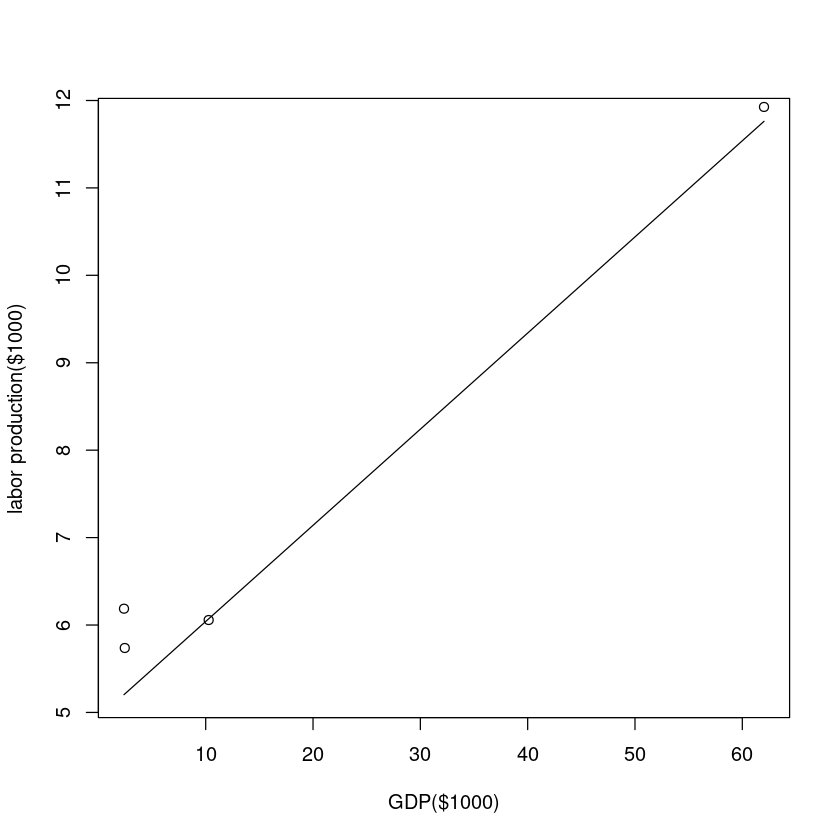

In [46]:
# graph to help visualize
curve(beta0_2+ beta1_2*x,min(country2$gdp_pc),max(country2$gdp_pc),
xlab="GDP($1000)",ylab="labor production($1000)")
points(country2$gdp_pc,country2$labor_prod)

In [25]:
# Lm and summary function to check work
holder_2 <- lm(labor_prod~gdp_pc,data=country2)
summary(holder_2)


Call:
lm(formula = labor_prod ~ gdp_pc, data = country2)

Residuals:
      1       2       3       4       5 
-1.6603 -0.0137  0.9835  0.1645  0.5260 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.94095    0.64861   7.618   0.0047 **
gdp_pc       0.10997    0.02284   4.815   0.0171 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.159 on 3 degrees of freedom
Multiple R-squared:  0.8854,	Adjusted R-squared:  0.8472 
F-statistic: 23.18 on 1 and 3 DF,  p-value: 0.01707


In [26]:
# Unsure if I had to repeat this step for R squared
SST_2<-sum(country2$devlp^2)
SSR_2<-sum(country2$regres^2)
r_squared_2<-1-SSR_2/SST_2
r_squared_2

[1] 0.8854152

i) How do your estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ change between the two sets of 5 countries? Discuss and briefly explain this variation in 3-5 sentences.

In [27]:
c(beta0,beta1,beta0_2,beta1_2)

[1] 1.7858121 1.3092161 4.9409543 0.1099701

Countries1 = Set A and Countries 2 = Set B ==> I prefer these names. 
There are changes between two sets of countries shown through their B0 and b1. 

In set A, we observe beta0 to be at 1.78 and for set B, we observe beta0 to be 4.9. This predicts a higher amount of labor production in agruilcture country when the GDP is at 0 for set B, so set B at 0 GDP per capital has higher production than set A at 0 GDP spending.

In set A, we observe beta1 to be at 1.30 and for set B, we observe the beta1 to be at 0.10. This predicts that set A, would have change of 1.30 or 130%(increase) change for every added unit of GDP(increase) and for set B the change would icnrease by .10 or 10% for every added unit of GDP. 

 # Exercise 2. Regression Assumptions

Refer to the first figure.  Suppose you wanted to estimate the relationship between GDP and Agricultural Productivity.  

a) Write down assumption SLR2.  Interpret the assumption in this context (1-3 sentences), and discuss whether you think it is likely to hold for this exercise (2-4 sentences)

SLR2 states that {(xi,yi), i = 1 --- N} is a random sample from the population. This assumptions is telling us that we can pick random 5 countries from all countries and not cherry pick countries and expect the same results(linear regression). SLR2 doesn't hold in these two data sets of countries because its so drastically different between beta1 are by 10 times. If they SLR2 would hold true we would need both data sets or samples to be close in their Beta1 values to one another when calculated. 

b) Write down assumption SLR4. Interpret the assumption in this context (1-3 sentences), and discuss whether you think it is likely to hold for this exercise (2-4 sentences)

SLR4 states that no matter what we observe in X to be, we expect that unobserved in u to be zero E|u|x| = 0. The difference between bet0 tells us that the measurement has incurracy by the two groups of countries data set. In this case the SLR4 wouldn't hold true because if you select more than 2 data sets and the Beta0 not are different by much than SLR4 doesn't hold true.Since beta0 are drastically different you haven't produced the "U" correctly. U is a factor of 4 different between country 1 and country 2 and not 0, tells us they are inendquatively measured, hence why SLR doesn't hold True. 

# Submission Instructions 

Go to the file dropdown menu and select the ”Download as” dropdown menu. In this menu make sure to select ”PDF via HTML” (the bottom option, not the middle one) or "PDF via Chrome" (if that option appears instead). 

The figures in the problem statement may not show up in the pdf you generate. That is ok.

Once you have downloaded this pdf, make sure it shows all your answers and upload it to Gradescope.